In [31]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import rc
import seaborn as sns

rc('text', usetex=True)

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 30
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 20
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3


### Gravitational waveform reading

In [60]:
# def GetStrainModeExtrapolated(p, mode=(2,2), order=2): 
#     l = mode[0]
#     m = mode[1]
#     h_file = p + 'rhOverM_Asymptotic_GeometricUnits.h5' 
#     f = h5py.File(h_file, 'r')
#     data = f['Extrapolated_N'+str(order)+'.dir']['Y_l' + str(l) + '_m'  + str(m) + '.dat']
#     time, re, im = data[:,0], data[:,1], data[:,2]
#     h = re + 1j*im
#     return time, h

def GetStrainMode(p, radius_index=-2, mode=(2,2)): 
    l = mode[0]
    m = mode[1]
    strain_file = p + '/rh_FiniteRadii_CodeUnits.h5' 
    f = h5py.File(strain_file, 'r')
    print("There are %d total radii" % (len(f.keys()) - 1))
    """ The -1 has to be here since f.keys() not only has radii, but
      an extra field called `Version` """
    radius = sorted(f.keys())[radius_index]
    radius_value = int(radius.split("R")[1].split('.dir')[0])
    print("Reading data for radius", radius_value)
    data = f[radius]['Y_l' + str(l) + '_m'  + str(m) + '.dat']
    time, re, im = data[:,0], data[:,1], data[:,2]
    h = re + 1j*im
    return radius_value, time, h

def GetPeakTimeMode(time, data): 
    ## Peak time being the peak of the magnitude of the data
    t_peak = time[np.argmax(np.absolute(data))]
    return t_peak

def SubtractPeakTimeMode(time, data): ###
    t_peak = GetPeakTimeMode(time, data)
    return time - t_peak

### Gravitational waveform reading

There are 24 total radii
Reading data for radius 129
There are 24 total radii
Reading data for radius 167
There are 24 total radii
Reading data for radius 255
There are 24 total radii
Reading data for radius 535


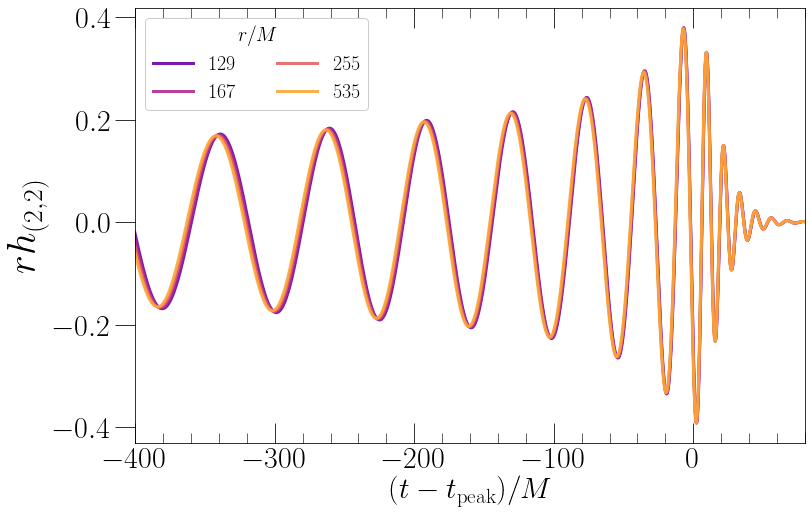

In [62]:
def PlotWaveforms(data_dir):     

    fig, ax = plt.subplots(1, figsize=(12,8))
    
    radii_indices = [0, 7, 15, 23]
    colors = sns.color_palette('plasma', n_colors=len(radii_indices))
    for radius_index, color in zip(radii_indices, colors):
        
        radius_value, time, data = GetStrainMode(data_dir, radius_index = radius_index) 
        time = SubtractPeakTimeMode(time, data)
    
        ax.plot(time, np.real(data), color = color, ls='-', alpha=0.9, lw = 3.0, label=r'%d' % radius_value)
    
    ax.set_ylabel('$rh_\mathrm{(2,2)}$', fontsize=40)
    ax.set_xlabel('$(t - t_\mathrm{peak})/M$') 
    plt.xlim(-400, 80)
    leg = ax.legend(loc='upper left', title = '$r/M$', framealpha=1.0, frameon=True, fontsize=20, ncol=2)
    plt.setp(leg.get_title(), fontsize = 20)

    plt.savefig('strain_radii.pdf')
    plt.show()     

PlotWaveforms("/mnt/ceph/users/mokounkova/Kerrness_0p1_0m1_q1/BBH_SKS_d11_q1_sA_0_0_0.100_sB_0_0_-0.100/Lev2")